# SVM - Support Vector Machine (метод опорных векторов)


## What will we do?

Мы построим SVM модель, которая найдет оптимальную гиперплоскость, максимизирующую разницу между двумя классами игрушечных данных, используя градиентный спуск.  


## Когда приенимо SVMs?

-Классификация, регрессия (прогнозирование временных рядов и т.д.), обнаружение выбросов, кластеризация


## Сравнение SVM с др. ML моделями:

- Как правило, SVM отлично подходят для относительно небольших наборов данных с меньшим количеством выбросов.
- Другие алгоритмы (случайные леса, глубокие нейронные сети и т.д.) требуют больше данных, но почти всегда дают очень надежные модели.
- Решение о том, какой классификатор использовать, зависит от вашего набора данных и общей сложности задачи.
- "Преждевременная оптимизация - корень всего зла (или, по крайней мере, большей его части) в программировании". - Дональд Кнут, профессор CS (речь на премии Тьюринга, 1974)  


## Support Vector Machine - описание алгоритма:

Это контролируемый алгоритм машинного обучения, который может использоваться как для задач классификации, так и для задач регрессии. Но обычно это используется для классификации. Учитывая 2 или более помеченных классов данных, он действует как дискриминирующий классификатор, формально определяемый оптимальной гиперплоскостью, которая разделяет все классы. Новые примеры, которые затем отображаются в том же пространстве, могут быть классифицированы в зависимости от того, по какую сторону разрыва они находятся.

## Опорные вектора - Support Vectors:

![alt text](https://www.dtreg.com/uploaded/pageimg/SvmMargin2.jpg "Logo Title Text 1")

Опорные векторы - это точки данных, ближайшие к гиперплоскости, точки набора данных, удаление которых изменило бы положение разделяющей гиперплоскости. Из-за этого их можно считать критическими элементами набора данных, именно они помогают нам создавать нашу SVM.

## Гиперплоскость:

![alt text](http://slideplayer.com/slide/1579281/5/images/32/Hyperplanes+as+decision+surfaces.jpg "Logo Title Text 1")

Геометрия говорит нам, что гиперплоскость - это подпространство, которое на одно измерение меньше окружающего его пространства. Например, гиперплоскость n-мерного пространства − это плоское подмножество с размерностью n - 1. По своей природе он разделяет пространство на два полупространства.

## Let's define our loss function (what to minimize) and our objective function (what to optimize)

#### Loss function

Используем Hinge loss. Эта функция потерь, используемая для обучения классификаторов. Hinge loss используется для "maximum-margin" классификации.

![alt text](http://i.imgur.com/OzCwzyN.png "Logo Title Text 1")


c - функция потерь, x - выборка, y - истинная метка, f(x) - прогнозируемая метка.

![alt text](http://i.imgur.com/FZ7JcG3.png "Logo Title Text 1")


#### Objective Function

![alt text](http://i.imgur.com/I5NNu44.png "Logo Title Text 1")

Как вы можете видеть, наша цель SVM состоит из двух терминов. Первый член - это регуляризатор, сердце SVM, второй член - потеря. Регуляризатор балансирует между максимизацией маржи и убытками. Мы хотим найти поверхность принятия решения, которая находится максимально далеко от любых точек данных.

Как нам минимизировать наши потери / оптимизировать для достижения нашей цели (т.е. учиться)?

Мы должны вывести нашу целевую функцию, чтобы получить градиенты! Градиентный спуск ftw. Поскольку у нас есть два члена, мы выведем их отдельно, используя правило суммы при дифференцировании.


![alt text](http://i.imgur.com/6uK3BnH.png "Logo Title Text 1")

Это означает, что если у нас неправильно классифицированная выборка, мы обновляем весовой вектор w, используя градиенты обоих терминов, в противном случае, если классифицировано правильно, мы просто обновляем w по градиенту регуляризатора.



Условие неправильной классификации

![alt text](http://i.imgur.com/g9QLAyn.png "Logo Title Text 1")

Правило обновления весов (неправильная классификация)

![alt text](http://i.imgur.com/rkdPpTZ.png "Logo Title Text 1")

Введем параметр скорости обучения(learning rate) η и регуляризатор λ
параметр скорости обучения - длина шагов, которые алгоритм делает по градиенту на кривой ошибок.
- Learning rate слишком велик? Алгоритм может перескочить оптимальную точку.
- Learning rate слишком мал? Алгоритм может сходиться в оптимальную точку слишком долго.

Regularizer это компромисс между низкой training error и низкой testing error - т.е. способность обобщения модели на новые\тестовые данные. Обычно этот параметр выбирают равным обратным количеству эпох.
- Regularizer слишком велик high? Переобучение (большая testing error)
- Regularizer слишком  мал? Переобучение (большая training error)

Правило обновления весов (правильная классификация)

![alt text](http://i.imgur.com/xTKbvZ6.png "Logo Title Text 1")


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/melwinlobo18/K-Nearest-Neighbors/master/Dataset/data.csv'
df = pd.read_csv(url)  # Dataset - Breast Cancer Wisconsin Data
df['diagnosis'] = df['diagnosis'].map({
    'M': 1,
    'B': 2
})  # Label values - 1 for Malignant and 2 for Benign
labels = df['diagnosis'].tolist()
df['Class'] = labels  #Cpying values of diagnosis to newly clreated labels column
df = df.drop(['id', 'Unnamed: 32', 'diagnosis'],
             axis=1)  #Dropping unncessary columns
df.head()  #Displaying first five rows of the dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
target_names = ['', 'M', 'B']
df['attack_type'] = df.Class.apply(lambda x: target_names[x])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Class,attack_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,M


In [4]:
df1 = df[df.Class == 1]
df2 = df[df.Class == 2]

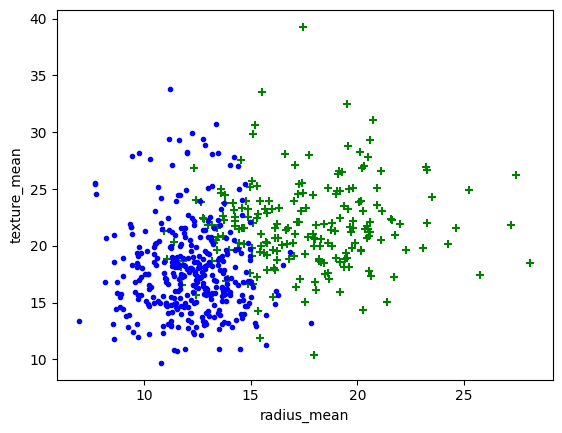

In [5]:
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.scatter(df1['radius_mean'], df1['texture_mean'], color='green', marker='+')
plt.scatter(df2['radius_mean'], df2['texture_mean'], color='blue', marker='.')

In [6]:
X = df.drop(['Class', 'attack_type'], axis='columns')
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y = df.Class

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
print(len(X_train))
print(len(X_test))

398
171


In [10]:
model = SVC(kernel='linear')

In [11]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
predictions = model.predict(X_test)
print(predictions)

[2 1 1 1 1 1 2 2 2 1 2 2 1 1 1 2 2 1 1 2 2 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1
 1 2 2 2 2 2 2 2 1 1 1 2 2 1 2 2 2 2 1 2 1 1 2 1 2 2 2 2 2 1 1 1 1 2 2 2 1
 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 1 1 1 1 2 1 1 2 2 2
 1 1 1 2 2 2 2 1 1 2 1 2 2 1 1 2 2 2 1 2 2 2 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2
 2 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2]


In [13]:
percentage = model.score(X_test, y_test)

In [14]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[ 56   5]
 [  2 108]]
Test Set: 171
Accuracy = 95.90643274853801 %


## Kernel SVM

Данные не всегда могут быть хорошо разделены (гипер)плоскостью. Например, рассмотрим следующее: у нас есть данные по дозировке лекарства и 2 класса — пациенты, которые поправились, и те, которым лучше не стало.

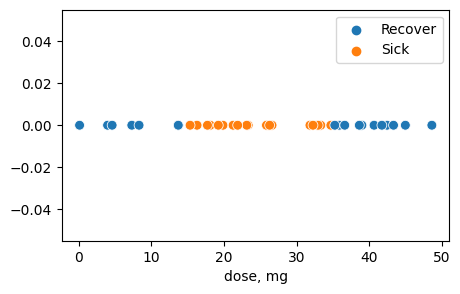

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


def generate_patients_data(total_len=40):
    x = np.random.uniform(0, 50, total_len)
    y = np.zeros_like(x)
    y[(x > 15) & (x < 35)] = 1
    return x, y


def plot_data(x, y, total_len=40, s=50):
    plt.figure(figsize=(5, 3))
    ax = sns.scatterplot(x=x, y=np.zeros(len(x)), hue=y, s=s)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Recover", "Sick"])
    ax.set(xlabel="dose, mg")
    return ax


total_len = 40
x, y = generate_patients_data(total_len=total_len)
ax = plot_data(x, y, total_len=total_len)
plt.show()

Соответственно, мы не можем найти такое пороговое значение, которое будет разделять наши классы на больных и здоровых, а, следовательно, и Support Vector Classifier работать тоже не будет.  Для начала давайте преобразуем наши данные таким образом, чтобы они стали 2-хмерными. В качестве значений по оси Y будем использовать дозу, возведенную в квадрат (**доза**$^2$).

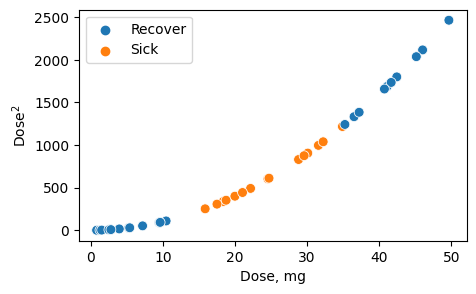

In [16]:
def plot_data(x, y, total_len=40, s=50):
    plt.figure(figsize=(5, 3))
    ax = sns.scatterplot(x=x[0, :], y=x[1, :], hue=y, s=s)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Recover", "Sick"])
    ax.set(xlabel="Dose, mg")
    ax.set(ylabel="Dose$^2$")
    return ax


total_len = 40
x_1, y = generate_patients_data(total_len=total_len)
x_2 = x_1**2
x = np.vstack([x_1, x_2])

plot_data(x, y, total_len=40, s=50)
plt.show()

Теперь мы можем вновь использовать Support Vector Classifier для классификации

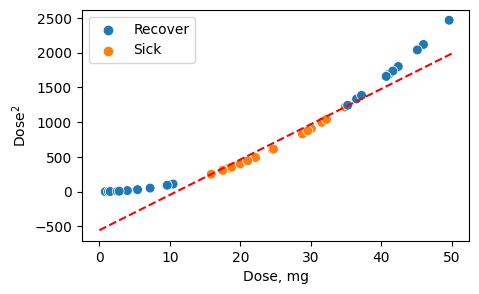

In [17]:
plot_data(x, y, total_len=40, s=50)

x_arr = np.linspace(0, 50, 50)
xs = [x[0, :][y == 1].min(), x[0, :][y == 1].max()]
ys = [x[1, :][y == 1].min(), x[1, :][y == 1].max()]

# Calculate the coefficients.
coefficients = np.polyfit(xs, ys, 1)

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
y_axis = polynomial(x_arr)

# ...and plot the points and the line
plt.plot(x_arr, y_axis, "r--")
plt.show()

Но тут возникает резонный вопрос: почему мы решили возвести в квадрат? Почему не в куб? Или, наоборот, не извлечь корень? Как нам решить, какое преобразование использовать?

И у нас есть **вторая проблема** — а если перейти надо в пространство очень большой размерности? В этом случае наши данные очень сильно увеличатся в размере.

Комбинация двух проблем дает нам **много сложности**: надо перебирать большое число возможных пространств большей размерности


Однако основная фишка Support Vector Machine состоит в том, что внутри он работает на скалярных произведениях. И можно эти скалярные произведения считать, **не переходя в пространство большей размерности**

Для этого SVM использует **Kernel Function**.

Kernel Function может, например, быть полиномом (**Polynomial Kernel Function**), который имеет параметр $d$ — сколько размерностей выбрать.


<img src="https://edunet.kea.su/repo/EduNet-content/L02/out/svm_kernel_function.png" width="700">


Примеры ядер :

* $k(x_i, x_j) = (<x_i, x_j> + c)^d, с, d \in \mathbb{R}$ — полиномиальное ядро, считает расстояние между объектами в пространстве размерности d

* $k(x_i, x_j) = \frac{1}{z} e^{-\frac{h(x_i, x_j)^2}{h}}$ — радиальная базисная функция RBF

Таким образом, в случае SVM можно легко перебрать много таких пространств на кросс-валидации и выбрать более удобное.

Более того, SVM может проверять пространства признаков бесконечного размера, если для такого пространства существует kernel function. Для решения практических задач иногда такие бесконечномерные пространства признаков могут оказаться удобными. Широко применяемое на практике RFB ядро как раз соответствует такому случаю бесконечномерного пространства признаков.
